In [1]:
import torchaudio
import matplotlib.pyplot as plt
import IPython.display as ipd
import os
import torch
from torch.utils.data import Dataset, DataLoader
from pathlib import Path

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%pwd

'/home/cuilab/AAI2022Fall-Project/data_processing'

In [11]:
def plot_audio(filename):
    waveform, sample_rate = torchaudio.load(filename)

    print("Shape of waveform: {}".format(waveform.size()))
    print("Sample rate of waveform: {}".format(sample_rate))

    plt.figure()
    plt.plot(waveform.t().numpy())

    return waveform, sample_rate

Shape of waveform: torch.Size([1, 134640])
Sample rate of waveform: 16000


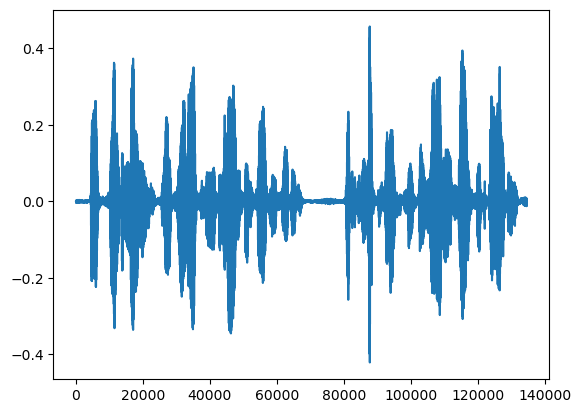

In [12]:
file_path="../LibriSpeech-SI/train/spk001/spk001_002.flac"

waveform, sample_rate=plot_audio(file_path)

ipd.Audio(waveform.numpy(), rate=sample_rate)

In [2]:
def load_audio_files(path):

    dataset = []
    walker = sorted(str(p) for p in Path(path).glob(f"*.flac"))

    for i, file_path in enumerate(walker):
        path, filename = os.path.split(file_path)
        speaker, _ = os.path.splitext(filename)
        speaker_id, utterance_number = speaker.split("_")
        speaker_id = int(speaker_id[3:])
        utterance_number = int(utterance_number)
    
        # Load audio
        waveform, sample_rate = torchaudio.load(file_path)
        dataset.append([waveform, sample_rate, speaker_id, utterance_number])
        
    return dataset

In [3]:
data_spk1=load_audio_files("../LibriSpeech-SI/train/spk001/")
data_spk2=load_audio_files("../LibriSpeech-SI/train/spk002/")

print("Len of spk1 dataset:", len(data_spk1))
print("Len of spk2 dataset:", len(data_spk2))

Len of spk1 dataset: 100
Len of spk2 dataset: 102


Waveform shape: torch.Size([1, 134640])
Sample rate: 16000
Speaker: 001 

Shape of transformed waveform: torch.Size([1, 33660])
Sample rate: 4000


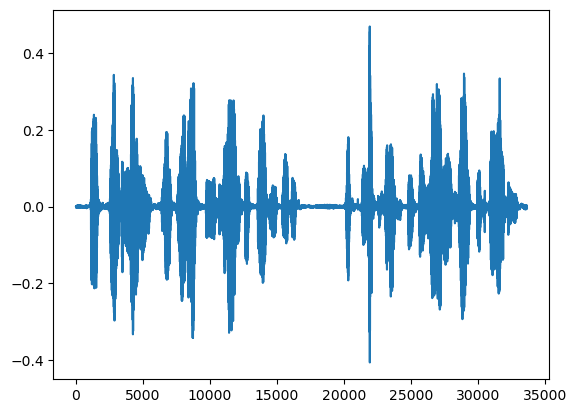

In [9]:
def show_waveform(waveform, sample_rate, speaker, factor):
    print("Waveform shape: {}\nSample rate: {}\nSpeaker: {} \n".format(waveform.shape, sample_rate, speaker))
    new_sample_rate = sample_rate//factor
   
    # Resample applies to a single channel, we resample first channel here
    channel = 0
    waveform_transformed = torchaudio.transforms.Resample(sample_rate, new_sample_rate)(waveform[channel,:].view(1,-1))

    print("Shape of transformed waveform: {}\nSample rate: {}".format(waveform_transformed.size(), new_sample_rate))

    plt.figure()
    plt.plot(waveform_transformed[0,:].numpy())
    
    return waveform_transformed, new_sample_rate

waveform_transformed, new_sample_rate = show_waveform(data_spk1[0][0], 16000, "001", 4)
ipd.Audio(waveform_transformed.numpy(), rate=new_sample_rate)